In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

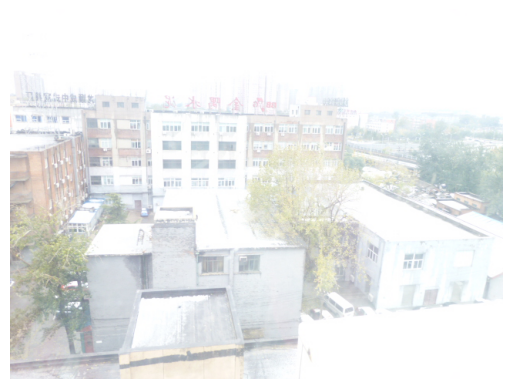

In [2]:
imgs = cv2.imread('sample_images/sample01.jpg')
if imgs is None:
    print("Error: Unable to load image")
    exit()
img = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
def hist_equal(imgn):
    normalized = []
    n, bins, patches = plt.hist(imgn)
    for i in range(bins):
        normalized.append(n[i]/sum(n))

    normalized[0] *= bins-1
    for i in range(1,bins):
        normalized[i] = normalized[i]*(bins-1) + normalized[i-1]
        normalized[i-1] = round(normalized[i-1])
    normalized[bins-1] = round(normalized[i-1])

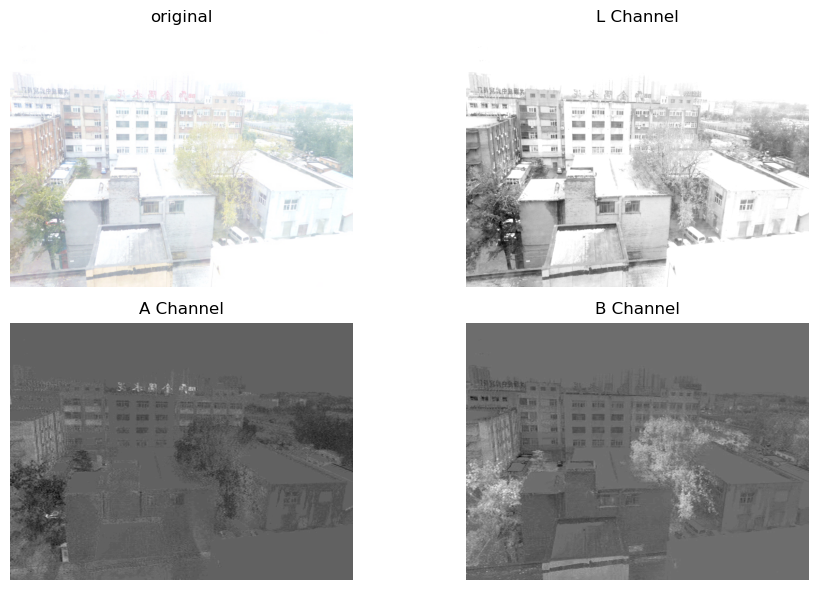

In [4]:
def lab(img):
    lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab_img)
    # a_rgb = 
    plt.figure(figsize=(10, 6))
    
    plt.subplot(2, 2, 1)
    plt.imshow(img)
    plt.title('original')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(l, cmap='gray')
    plt.title('L Channel')
    plt.axis('off')

    # Plot the A channel
    plt.subplot(2, 2, 3)
    plt.imshow(a, cmap='gray')
    plt.title('A Channel')
    plt.axis('off')

    # Plot the B channel
    plt.subplot(2, 2, 4)
    plt.imshow(b, cmap='gray')
    plt.title('B Channel')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    return l, a, b
l,a,b = lab(img)

In [5]:
def he(img):
    s = np.shape(img)
    img = np.reshape(img, s[0]*s[1])
    bins = range(257)
    bins = np.array(bins) - 0.5
    counts, bins = np.histogram(img, bins = bins)
    pdf = counts / counts.sum()
    cdf = np.zeros(256)
    for i in range(256):
        cdf[i] = cdf[max(0,i-1)] + pdf[i]
    cdf = cdf * 255
    cdf = np.round(cdf)
    return cdf
        
normalized_l = he(l)
print(normalized_l)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   2.   2.   2.   2.
   2.   3.   3.   3.   3.   4.   4.   4.   5.   5.   6.   6.   6.   7.
   7.   8.   9.   9.  10.  11.  11.  12.  13.  13.  14.  15.  16.  17.
  18. 

(-0.5, 639.5, 479.5, -0.5)

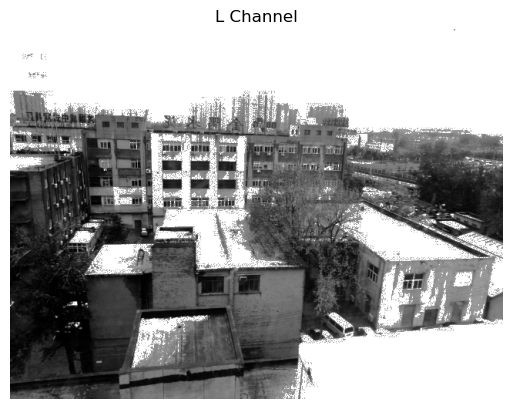

In [6]:
def apply(channel, normal):
    res = np.zeros(np.shape(channel))
    sh = np.shape(channel)
    for i in range(sh[0]):
        for j in range(sh[1]):
            res[i][j] = normal[channel[i][j]]
    return res
res = apply(l, normalized_l)
plt.imshow(res, cmap='gray')
plt.title('L Channel')
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

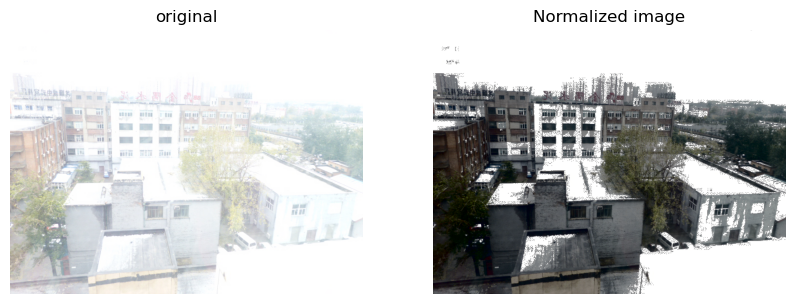

In [12]:
res = cv2.resize(res, (a.shape[1], a.shape[0]))
b = cv2.resize(b, (a.shape[1], a.shape[0]))
res = res.astype(np.uint8)
lab_image = cv2.merge([res, a, b])
rgb_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
# a_rgb = 
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rgb_image)
plt.title('Normalized image')
plt.axis('off')